# Ensemble Models - Modelos Avanzados

Este notebook contiene modelos ensemble para mejorar sobre el baseline establecido.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

from configure import DATA_DIR
from src.load_data import load_data

In [28]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Load data
df = load_data(DATA_DIR/'processed/fetal_health_clean.csv')

In [30]:
# Define features and target variable
X = df.drop(['fetal_health'], axis = 1)
y = df['fetal_health']

In [31]:
from sklearn.model_selection import train_test_split
# Splitting the training and test variables (mismo random_state que baseline)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

In [32]:
# Ensemble Models - Modelos avanzados para mejorar baseline

from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score

# Pipelines de modelos ensemble
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_gbcl = Pipeline([('gbcl_classifier', GradientBoostingClassifier())])
pipeline_ada = Pipeline([('ada_classifier', AdaBoostClassifier())])

# Lista de pipelines ensemble
ensemble_pipelines = [pipeline_rf, pipeline_gbcl, pipeline_ada]

# Diccionario para ensemble
ensemble_dict = {0: 'Random Forest', 1: 'Gradient Boost', 2: 'AdaBoost'}

# Entrenar modelos ensemble
for pipe in ensemble_pipelines:
    pipe.fit(X_train, y_train)

In [33]:
# Evaluando modelos ensemble
ensemble_results = []
for i, model in enumerate(ensemble_pipelines):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    ensemble_results.append([ensemble_dict[i], train_score, test_score, f1, recall])
    
ensemble_df = pd.DataFrame(ensemble_results, columns=['Model', 'Train Score', 'Test Score', 'F1 Score', 'Recall Score'])
ensemble_df = ensemble_df.round(4)
print("=" * 70)
print("RESULTADOS ENSEMBLE MODELS")
print("=" * 70)
ensemble_df.sort_values(by='Test Score', ascending=False)

RESULTADOS ENSEMBLE MODELS


,Model,Train Score,Test Score,F1 Score,Recall Score
0,Random Forest,0.9994,0.9220,0.9198,0.9220
1,Gradient Boost,0.9941,0.9196,0.9183,0.9196
2,AdaBoost,0.9095,0.8676,0.8648,0.8676


# ========================================
# MEJOR MODELO ENSEMBLE
# ========================================

In [34]:
# Identificar mejor modelo ensemble
best_idx = ensemble_df['Test Score'].idxmax()
best_model_name = ensemble_df.loc[best_idx, 'Model']
best_model = ensemble_pipelines[best_idx]

print("=" * 70)
print("MEJOR MODELO ENSEMBLE")
print("=" * 70)
print(f"🏆 Modelo: {best_model_name}")
print(f"📊 Test Score: {ensemble_df.loc[best_idx, 'Test Score']:.4f}")
print(f"📊 F1 Score: {ensemble_df.loc[best_idx, 'F1 Score']:.4f}")
print(f"📊 Recall Score: {ensemble_df.loc[best_idx, 'Recall Score']:.4f}")
print("=" * 70)

MEJOR MODELO ENSEMBLE
🏆 Modelo: Random Forest
📊 Test Score: 0.9220
📊 F1 Score: 0.9198
📊 Recall Score: 0.9220


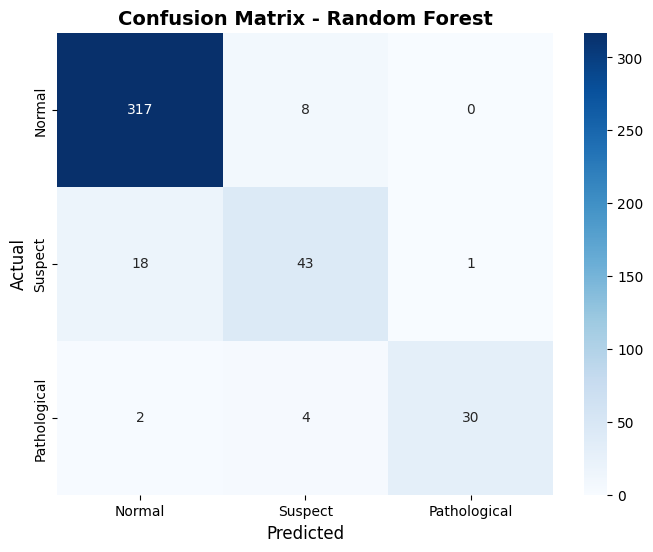

In [35]:
# Matriz de confusión del mejor modelo ensemble
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Suspect', 'Pathological'], 
            yticklabels=['Normal', 'Suspect', 'Pathological'])
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.show()

## 📋 Conclusiones - Ensemble Models

**Ensemble Models Evaluados:**
- Random Forest
- Gradient Boosting
- AdaBoost

**Resultado:**
- Mejor Ensemble: [Completar después de ejecutar]
- Test Score: [Completar]
- F1 Score: [Completar]

**Observaciones:**
- Modelos más complejos con mayor capacidad de aprendizaje
- Mayor tiempo de entrenamiento que baseline
- Generalmente mejor performance por agregación de predicciones

**Next Steps:**
- ✅ Ensemble models entrenados y evaluados
- ⏭️ Proceder con `model_comparison.ipynb` para comparar baseline vs ensemble
- Identificar mejor modelo global
- Hyperparameter tuning del mejor modelo

In [36]:
# Guardar resultados ensemble para comparación
ensemble_df.to_csv(DATA_DIR / 'processed' / 'ensemble_results.csv', index=False)
print(f"✅ Resultados guardados en: {DATA_DIR / 'processed' / 'ensemble_results.csv'}")

# Guardar mejor modelo ensemble (opcional - descomentar si quieres guardarlo)
# import pickle
# with open(MODELS_DIR / 'best_ensemble_model.pkl', 'wb') as f:
#     pickle.dump(best_model, f)
# print(f"✅ Modelo guardado en: {MODELS_DIR / 'best_ensemble_model.pkl'}")

✅ Resultados guardados en: /Users/ciprian/Desktop/factoria/projects/Equipo_4_Proyecto_VII_Modelos_de_ensemble/data/processed/ensemble_results.csv
